63136 55630


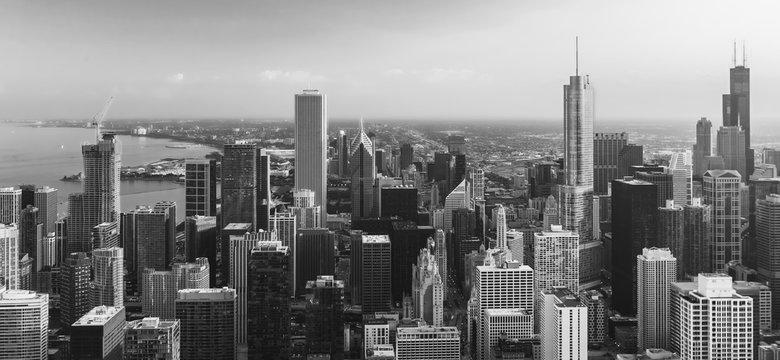

In [2]:
# Preparing library
import requests
import numpy as np
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import os

# Fetching Image
url = "https://raw.githubusercontent.com/mie-intel/Linear-Algebra/main/SVD/image.jpg"
response = requests.get(url)
raw_image = Image.open(BytesIO(response.content))
raw_image.save("image.jpg")
raw_image = raw_image.convert('L')
raw_image.save('image_grey.jpg')
print(os.path.getsize('image.jpg'), os.path.getsize('image_grey.jpg'))
raw_image

In [3]:
# Convert image to matrix
raw_matrix = np.array(raw_image)
raw_matrix

array([[176, 176, 176, ..., 246, 246, 246],
       [177, 177, 177, ..., 246, 246, 246],
       [179, 179, 179, ..., 246, 246, 246],
       ...,
       [ 69,  59,  57, ..., 125,  81,  65],
       [ 45,  44,  50, ..., 128,  82,  65],
       [101, 109, 119, ..., 124,  77,  59]], dtype=uint8)

In [4]:
# Printing image dimension
print("Matrix dimensions:")
print("{:5s}".format("Image"), ":", raw_matrix.shape)

print()

# preparing svd decomposition
U, S, Vt = np.linalg.svd(raw_matrix, full_matrices=False)
print("Single Value Decomposition")
print("{:>5s}".format("U"), ":", U.shape)
print("{:>5s}".format("S"), ":", S.shape)
print("{:>5s}".format("Vt"), ":", Vt.shape)

Matrix dimensions:
Image : (360, 780)

Single Value Decomposition
    U : (360, 360)
    S : (360,)
   Vt : (360, 780)


In [5]:
# Function to get the compressed matrix using k value
def compress(k):
    U_k = U[:,:k]
    S_k = S[:k]
    Vt_k = Vt[:k,:]
    plt.plot(S_k)

    S_k
    # S_k is vector (because we are using parameter full_matrices = False)
    print("S_K shape:", S_k.shape)
    plt.show()

    # Convert S_k into diagonal matrix
    S_k = np.diag(S_k)

    # dot product
    compressed_matrix = np.dot(np.dot(U_k, S_k), Vt_k)
    return compressed_matrix

S_K shape: (360,)


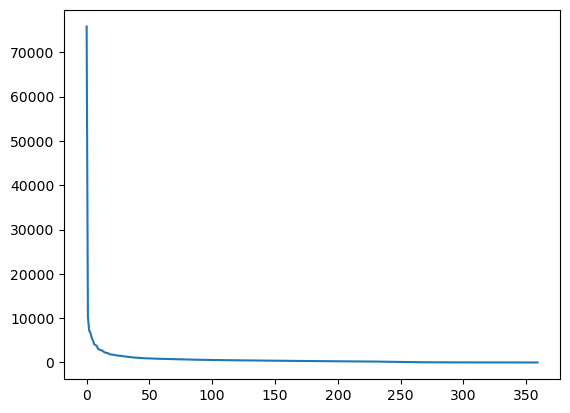

array([[176., 176., 176., ..., 246., 246., 246.],
       [177., 177., 177., ..., 246., 246., 246.],
       [179., 179., 179., ..., 246., 246., 246.],
       ...,
       [ 69.,  59.,  57., ..., 125.,  81.,  65.],
       [ 45.,  44.,  50., ..., 128.,  82.,  65.],
       [101., 109., 119., ..., 124.,  77.,  59.]])

In [6]:
# Let's try compress with k = maximum possible value
compress(360)

S_K shape: (100,)


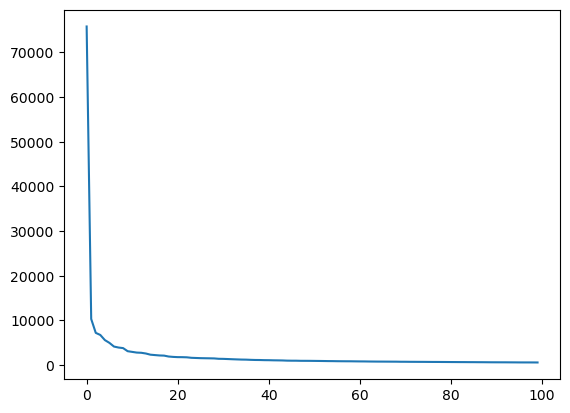

In [7]:
# Mencari K paling optimal
compressed_matrix = compress(100)

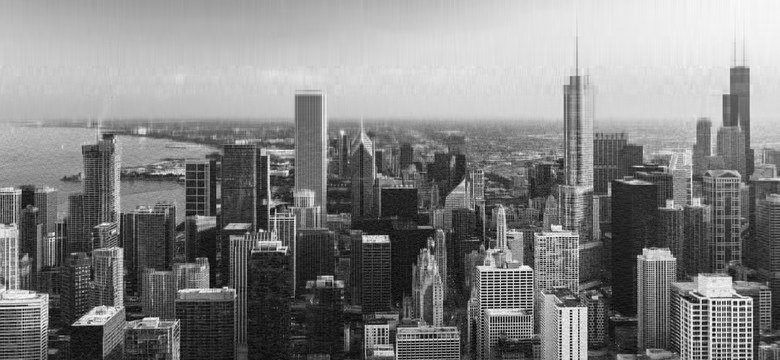

In [8]:
# Hapus nilai yang tidak di rentang 0 sampai 255
compressed_matrix = np.clip(compressed_matrix, 0, 255)

# Ubah jadi format gambar
compressed_matrix = compressed_matrix.astype(np.uint8)

# Bentuk gambar
compressed_image = Image.fromarray(compressed_matrix)
compressed_image.save("compressed_image.jpg")
compressed_image

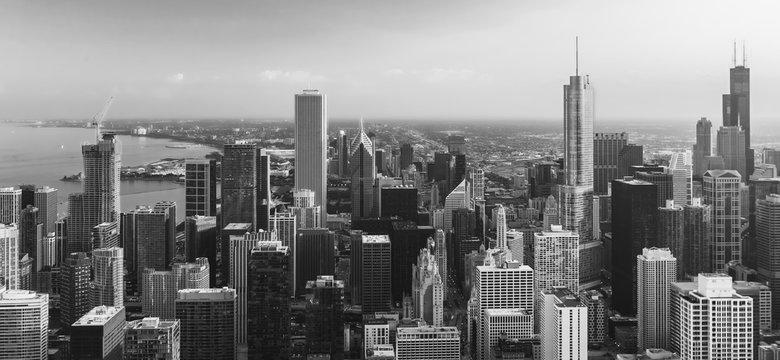

In [9]:
# Showing previously defined raw image
raw_image

In [10]:
# Get Image Size
import os

raw_size = os.path.getsize('image.jpg')
compressed_size = os.path.getsize('compressed_image.jpg')
compression_ratio = (1 - compressed_size / raw_size) * 100

print("Image size")
print("=" * 24)
print("{:10s}".format("Original"), ":", raw_size, "bytes")
print("{:10s}".format("Compressed"), ":", compressed_size, "bytes")
print("Image is {0:.2f}% smaller!".format(compression_ratio));

Image size
Original   : 63136 bytes
Compressed : 54269 bytes
Image is 14.04% smaller!
